In [261]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import networkx as nx

### Determine if increasing the diagonal elements of a directed lapacian can decrease it's spectral radius

In [304]:
def makeMtrx(n=10,p=.6):
    """Create a psudo-laplacian matrix for a directed random graph
    
    Parameters
    ----------
    n (int): Number of nodes
    p (float): 0 < p < 1 probability of a link between two nodes

    Returns
    -------
    L (nxn array): directed laplacian for the random graph
    """
    A = (np.random.rand(n,n) < p).astype(float)    
    for i in range(n):
        A[i,i] = 0
    L = np.diag(A.sum(axis=1)) - A
    return L

In [7]:
def spectralRad(A):
    """
    Returns the spectral radius of matrix A
    """
    eigs = la.eig(A)[0]
    eigs = (eigs*eigs.conj())**.5
    return max(eigs)

In [80]:
def plotSpect(L=None,n=10,p=.6):
    """
    Plots the spectral radius of the matrix L
    as the diagonal entries increase
    """
    
    dom = np.linspace(0,5,6)
    if L is None:
        L = makeMtrx(n=n,p=p)
    else:
        n = L.shape[0]
    rho = spectralRad(L)
    plt.plot(dom,np.ones(6)*rho)
    
    for i in range(n):
        spec = np.zeros(len(dom))
        for j in range(len(dom)):
            M = L.copy()
            M[i,i] += dom[j]
            spec[j] = spectralRad(M)
        plt.plot(dom,spec)
    plt.show()
    return L

In [305]:
def checkSpec(n=5,p=.15):
    """
    Finds matrixes where increasing the diagonal elements 
    decreases the spectral radius
    """
    dom = np.linspace(0,11,6)
    L = makeMtrx(n=n,p=p)
    rho = spectralRad(L)
    
    for i in range(n):
        spec = np.zeros(len(dom))
        for j in range(len(dom)):
            M = L.copy()
            M[i,i] += dom[j]
            if spectralRad(M) < rho:
                return L
    return None

In [291]:
smallerSpec = []
for i in range(1000):
    L = checkSpec()
    if L is not None:
        smallerSpec.append(L)

In [64]:
disconnected = []
for L in smallerSpec:
    eigs = la.eig(L)[0]
    eigs = (eigs.conj()*eigs)**.5
    if np.round(eigs[np.argsort(eigs)][1],4) > 0:
        disconnected.append(0)
    else:
        disconnected.append(1)

From here on it's just me goofing around with different things:

In [292]:
len(smallerSpec)

2

In [244]:
L = smallerSpec[17]

/Library/Python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: ComplexWarning: Casting complex values to real discards the imaginary part


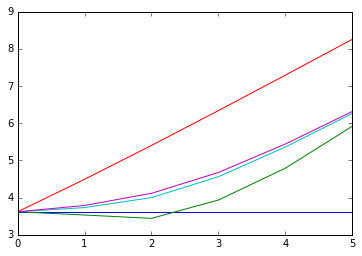

array([[ 1.,  0., -1.,  0.],
       [-1.,  3., -1., -1.],
       [ 0., -1.,  1.,  0.],
       [ 0., -1.,  0.,  1.]])

In [210]:
plotSpect(L=L)

In [77]:
np.linspace(0,5,6)

array([0., 1., 2., 3., 4., 5.])

In [211]:
spectralRad(L)

(3.6180339887499+0j)

In [241]:
M = L.copy()
M[0,0]+=1.559
spectralRad(M)

(3.2035454406728032+0j)

In [112]:
np.round(la.eig(M)[0],4)

array([0.382+0.j, 3.   +0.j, 2.618+0.j, 2.5  +0.j])

In [247]:
L2 = np.array([
    [1.,0,-1.,0],
    [-1,1,0,0],
    [0,-1,2,-1],
    [-1,-1,-1,3],
])

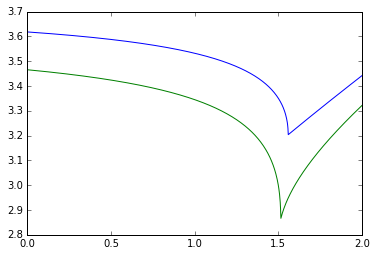

In [252]:
dom = np.linspace(0,2,1000)
spec1 = []
spec2 = []

for d in dom:
    M1 = L.copy()
    M2 = L2.copy()
    M1[0,0] += d
    M2[0,0] += d
    spec1.append(spectralRad(M1))
    spec2.append(spectralRad(M2))

plt.plot(dom,spec1)
plt.plot(dom,spec2)

In [258]:
M = L.copy()
M[0,0] = 2
M[2,2] = 2
print(np.max(la.eig(L)[0]))
print(np.max(la.eig(M)[0]))

(3.6180339887499+0j)
(3.618033988749898+0j)


In [306]:
def drawGraph(A):
    """Draws graph represented by adjacency matrix A"""
    m,n = A.shape
    labels = {}
    for i in range(n):
        labels[i]=str(i+1)
    gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
    nx.draw(gr,arrows=True,node_color='#15b01a',labels=labels)
    plt.show()

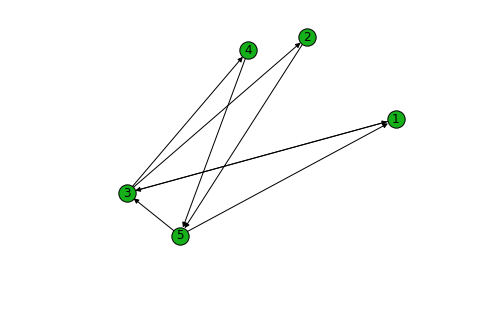

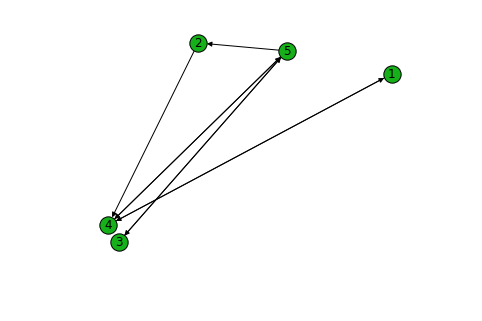

IndexError: list index out of range

In [293]:
for i in range(10):
    drawGraph(smallerSpec[i])